In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from itertools import product

In [3]:
df = pd.read_csv('./input/heart.csv')
print(df.shape)

(918, 12)


In [4]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df[df.Cholesterol != 0]
df = df[df.RestingBP != 0]

print(df.shape)

(746, 12)


In [9]:
numerical = df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
print('Numerical Columns: ', df[numerical].columns)

Numerical Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


In [10]:
categorical = df.select_dtypes('object').columns
print('Categorical Columns: {df[categorical].columns}\n')
# n unique categories
df[categorical].nunique()

Categorical Columns: {df[categorical].columns}



Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

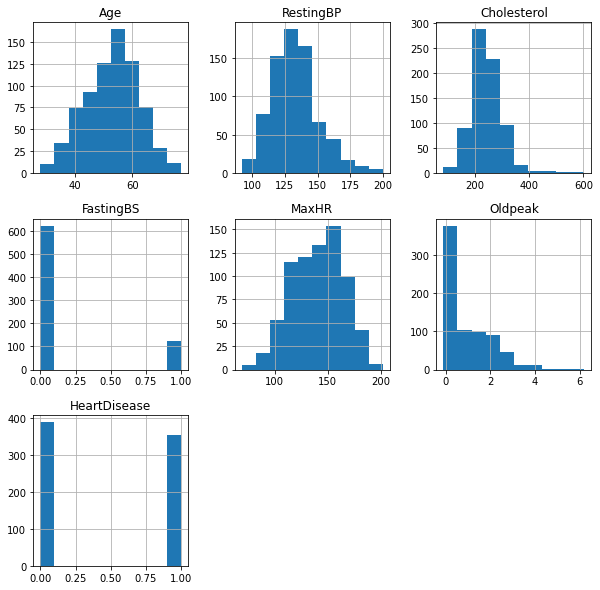

In [12]:
df.hist(figsize=(10,10))

Text(0.5, 1.0, 'Correlation Matrix')

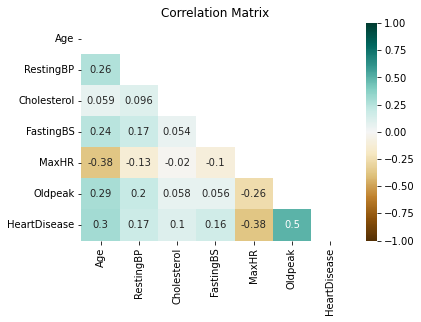

In [13]:
corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

s = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask)
s.set_title('Correlation Matrix')

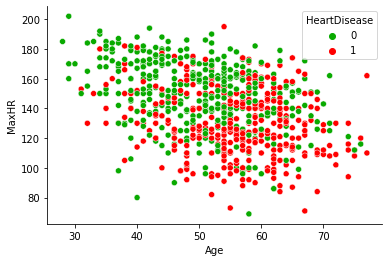

In [14]:
# set colors for heartdisease
colors = ['#09AA00', '#ff0000']
sns.scatterplot(x="Age", y="MaxHR", hue="HeartDisease", data=df, palette=colors)
sns.despine()

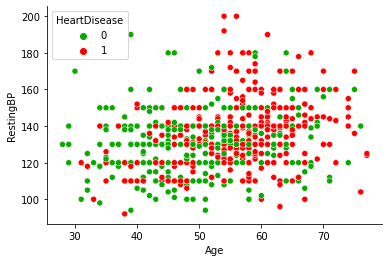

In [15]:
sns.scatterplot(x="Age", y="RestingBP", hue="HeartDisease",data=df, palette=colors)
sns.despine()

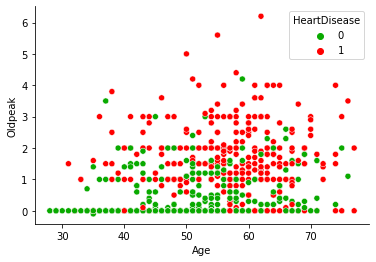

In [16]:
sns.scatterplot(x="Age", y="Oldpeak", hue="HeartDisease" ,data=df, palette=colors)
sns.despine()

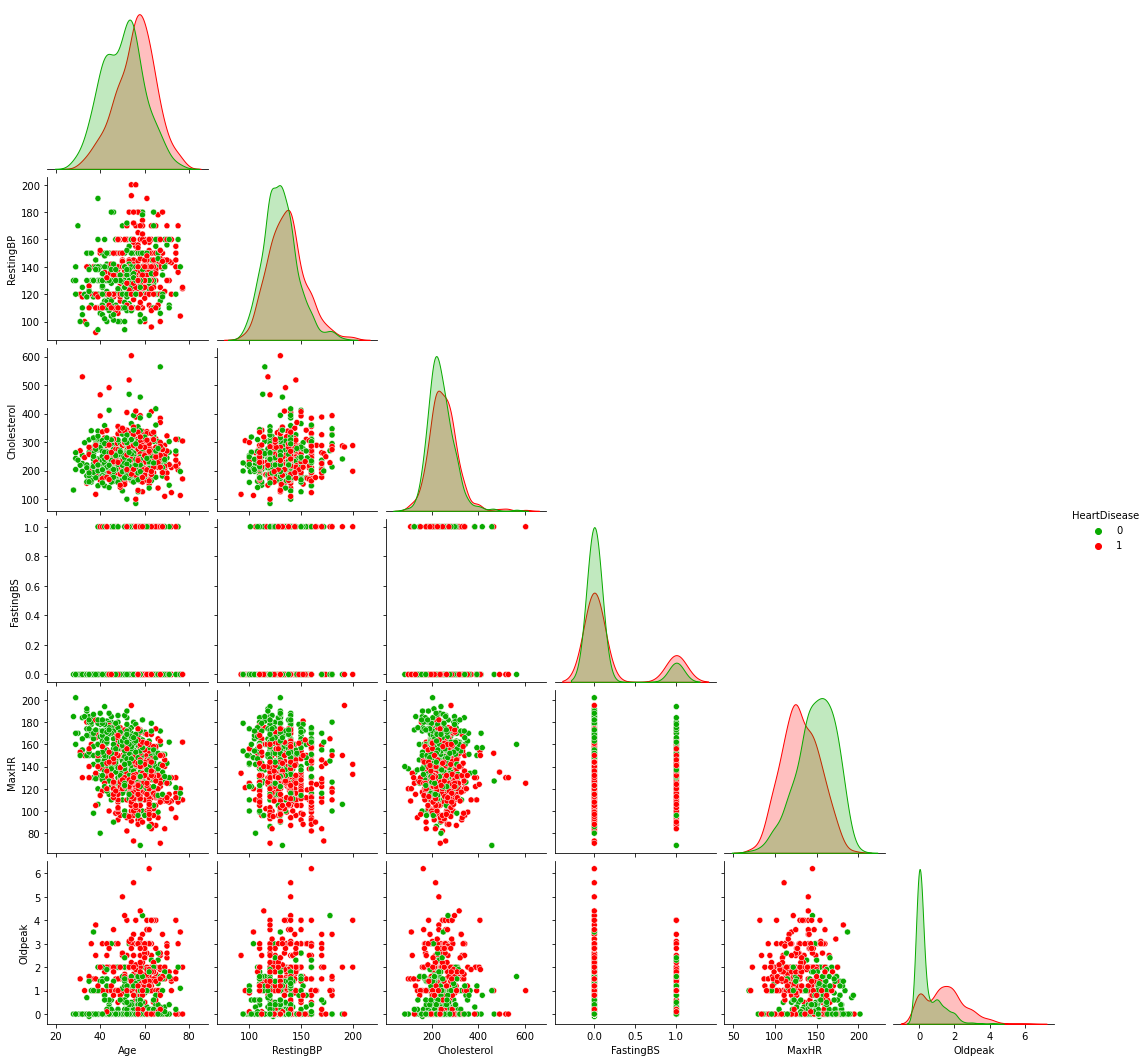

In [17]:
sns.pairplot(df, hue="HeartDisease", corner=True, palette=colors)

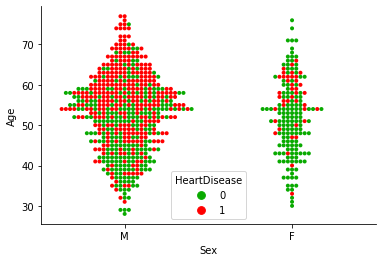

In [18]:
#Men more susceptible with older age
sns.swarmplot(y="Age", x="Sex", hue="HeartDisease", data=df, s=4, palette=colors)
sns.despine()

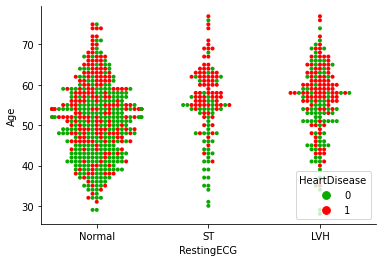

In [19]:
#Print the resting EKG
sns.swarmplot(y='Age', x='RestingECG', hue="HeartDisease", data=df, s=4, palette=colors)
sns.despine()

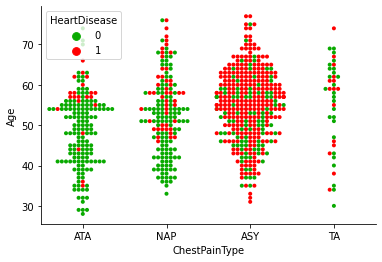

In [20]:
#Print the chest pain type => ASY strong correlation
sns.swarmplot(y="Age", x="ChestPainType", hue="HeartDisease", data=df, s=4, palette=colors)
sns.despine()

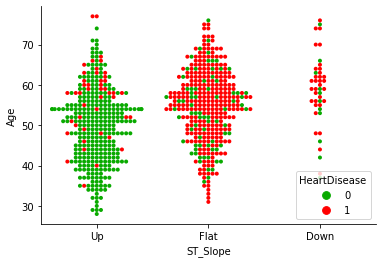

In [21]:
Print the ST_Slope => FLAT strong correlation
sns.swarmplot(y="Age", x="ST_Slope", hue="HeartDisease", data=df, s=4, palette=colors)
sns.despine()

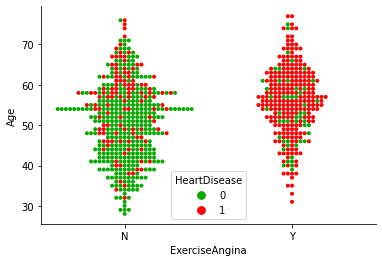

In [22]:
#Print influence of stress-dependent angina pectoris => YES strong correlation
sns.swarmplot(y="Age", x="ExerciseAngina", hue="HeartDisease", data=df, s=4, palette=colors)
sns.despine()

In [23]:
# determine categorical features
categ = df.select_dtypes(include=object).columns
print(categ)
# convert categorical features to numeric
df = pd.get_dummies(df, columns=categ, drop_first=True)

df.head(3)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1


In [24]:
y, X = df['HeartDisease'], df.drop(columns='HeartDisease')

In [25]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [26]:
#Verify correlation between features
# count oc PC's
cnt_pcs = 10
# create PC's
pca = PCA(n_components=cnt_pcs)
pcs = pca.fit_transform(X, y)
print(X.shape)
# name columns
dfPcs = pd.DataFrame(data=pcs, columns=[('PC' + str(i)) for i in range(1,cnt_pcs + 1)])
print(dfPcs.shape)
# add target
dfPca = pd.concat([dfPcs, df['HeartDisease']], axis=1)
dfPca.head()

(746, 15)
(746, 10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,HeartDisease
0,-2.764399,-0.379169,-1.541493,0.423761,-0.074723,-0.299962,0.847131,-1.068556,-0.453597,-0.360135,0.0
1,-0.073911,-0.999265,1.893361,0.951709,0.717856,0.554926,-0.990209,0.592121,-2.427131,-1.080517,1.0
2,-1.327806,2.058008,-1.937613,-1.710264,0.689382,-0.435149,0.191063,-0.485142,0.832890,-1.619408,0.0
3,1.502672,-1.595574,-0.431918,0.096059,0.693348,0.342713,-1.262904,0.935533,-0.588820,-0.338975,1.0
4,-1.268717,-0.123724,1.836431,0.233318,-0.707370,-1.682809,-0.895375,-0.368506,0.032033,-1.128260,0.0


In [27]:
#10x PC's from 15 features only cover ~ 87% of variance => less correlation
sum(pca.explained_variance_ratio_)

0.8723464944187047

0    390
1    356
Name: HeartDisease, dtype: int64
0    390
1    390
Name: HeartDisease, dtype: int64


Text(0.5, 1.0, 'HeartDiseases')

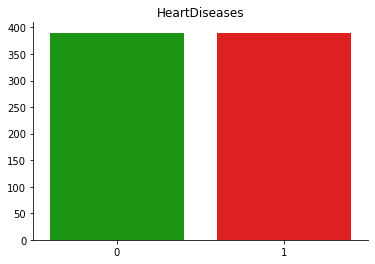

In [28]:
#Resample unbalanced classes

# print unbalanced classes 
labels_count = y.value_counts()
print(labels_count)

# oversample minority class with SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# print balanced classes 
labels_count = y.value_counts()
print(labels_count)

# plot HeartDisease
s = sns.barplot(x=labels_count.index, y=labels_count.values, palette=colors)
sns.despine()
s.set_xticklabels(s.get_xticklabels())
s.set_title('HeartDiseases')

In [29]:
#Stratified split of dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(702, 15)
(78, 15)
(702,)
(78,)


In [30]:
# hyperparameters
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1]

# stratisfied k cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# create list of all combinations
param_all = list(product(solvers, penalty, c_values))

# filter not allowed combinations
param_grid = [{'solver': [solvers], 'penalty' : [penalty], 'C': [c_values]}
            for solvers, penalty, c_values in param_all
                if not(solvers == 'newton-cg' and penalty == 'l1') and
                not(solvers == 'lbfgs' and penalty == 'l1') and
                not(solvers == 'sag' and penalty == 'l1')]

# create model
model = LogisticRegression()

# define gridsearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
# run gridsearch
grid_res = grid.fit(X_train, y_train)

# mean and deviation of each feature combination
means = grid_res.cv_results_['mean_test_score']
stds = grid_res.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_res.cv_results_['params']):
    print(f"{mean: .3f} (+/-{2 * std: .3f}) for {params}")

 0.861 (+/- 0.087) for {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
 0.861 (+/- 0.086) for {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
 0.864 (+/- 0.085) for {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
 0.867 (+/- 0.091) for {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
 0.861 (+/- 0.087) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
 0.861 (+/- 0.087) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
 0.861 (+/- 0.086) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
 0.864 (+/- 0.085) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
 0.861 (+/- 0.087) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
 0.861 (+/- 0.087) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
 0.862 (+/- 0.087) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
 0.864 (+/- 0.086) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
 0.861 (+/- 0.087) for {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
 0.861 (+/- 0.087) for {'C': 10, 'penalty': '

In [31]:
#Print model score with optimal hyperparameters
print("Optimal")
print("Accuracy:", grid_res.best_score_)
print("Std:", grid_res.cv_results_['std_test_score'][grid_res.best_index_])
print("Hyperparams:", grid_res.best_params_)

Optimal
Accuracy: 0.8690207914151575
Std: 0.041111798002083706
Hyperparams: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [32]:
#Train model with optimale hyperparameters and complete train dataset
model = LogisticRegression(solver=grid_res.best_params_['solver'], penalty=grid_res.best_params_['penalty'], C=grid_res.best_params_['C'])
model.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [33]:
#Verify accuracy with test dataset
score = model.score(X_test, y_test)
print(f"Accuracy: {score}")

Accuracy: 0.8461538461538461


<AxesSubplot:>

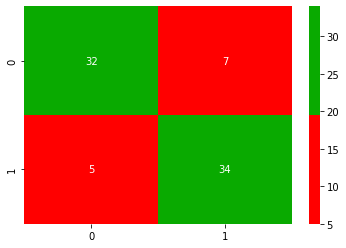

In [35]:
# predict labels
y_pred = model.predict(X_test)
# compare with true labels
cfm = confusion_matrix(y_test, y_pred)
# print confusion matrix
sns.heatmap(cfm, annot=True, cmap=['#ff0000', '#09AA00'])